# Cifar -100 이미지 분류 V1
- cifar-10과 동일한 모델

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

In [4]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'

]


In [5]:
import matplotlib.pyplot as plt


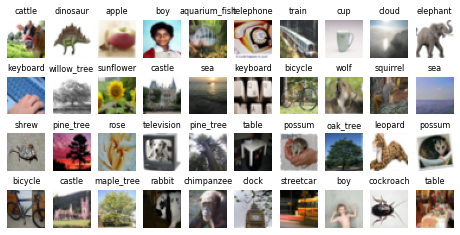

In [6]:
plt.figure(figsize = (8,4))
for i in range(40):
    plt.subplot(4,10, i+1)
    plt.imshow(X_train[i]) , plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize = 8)  # 하나의 주제당 500개의 데이터

plt.show()
    

In [7]:
# X data : 정규화, 0~1 사이의 실수(float32)로 변환 
# X_train = X_train.astype(float) / 255.  , X_train = X_train / 255.  ==> 이때는 64bit 실수형태
X_train = X_train.astype('float32') / 255.  # 0~255의 값이 있는데 CNN같은 경우 0~1인 경우가 최적의 성능을 낼수 있어서 나눔
X_test = X_test.astype(np.float32) /255.    # 그냥 변환하면 실수 64bit가 디폴트값, 우리는 32비트로 사용하기 때문에 32로 함


In [8]:
# Y data : one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding = 'same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), padding = 'same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

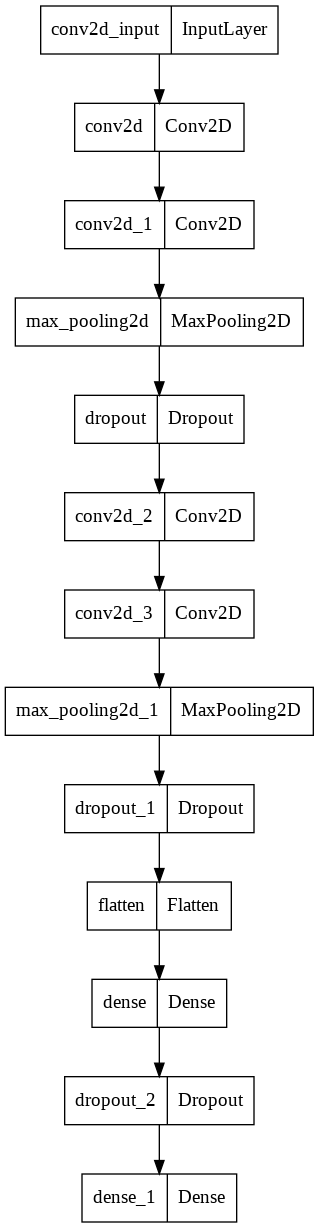

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
model_path = 'best-cifar100-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [14]:
hist = model.fit(
    X_train, Y_train, validation_split= 0.2,
    epochs=100, 
    batch_size = 32,
    verbose=2, 
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 4.08185, saving model to best-cifar100-v1.h5
1250/1250 - 22s - loss: 4.3626 - accuracy: 0.0389 - val_loss: 4.0819 - val_accuracy: 0.0912 - 22s/epoch - 18ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 4.08185 to 3.71511, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3.9703 - accuracy: 0.0936 - val_loss: 3.7151 - val_accuracy: 0.1459 - 6s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 3.71511 to 3.50234, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3.7040 - accuracy: 0.1360 - val_loss: 3.5023 - val_accuracy: 0.1791 - 6s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 3.50234 to 3.35527, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3.5217 - accuracy: 0.1649 - val_loss: 3.3553 - val_accuracy: 0.2054 - 6s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 3.35527 to 3.21266, saving model to best-cifar100-v1.h5
1250/1250 - 6s - loss: 3

In [20]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1292 - accuracy: 0.4473


[2.1292262077331543, 0.447299987077713]

In [21]:
import numpy as np
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

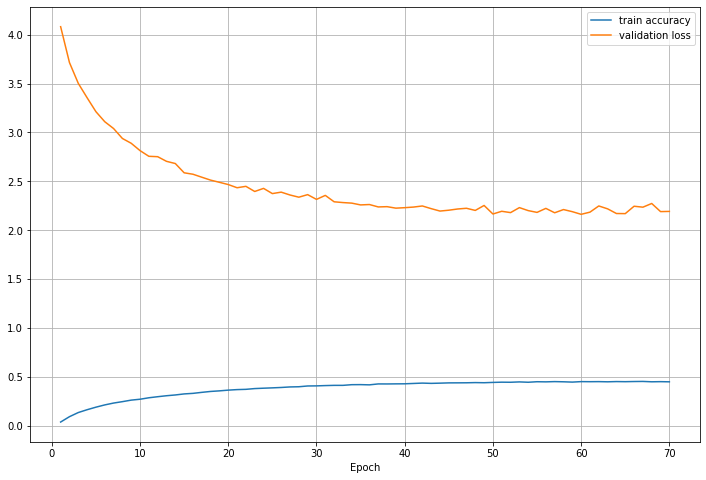

In [22]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()